In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

In [5]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

In [6]:
root_dir = "training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(20, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 10 # Only use 10 images for training

Loading 20 images
satImage_001.png
Loading 20 images
satImage_001.png


In [35]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [36]:
np.flip(a, 0)

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [37]:
np.rot90(np.rot90(a))

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

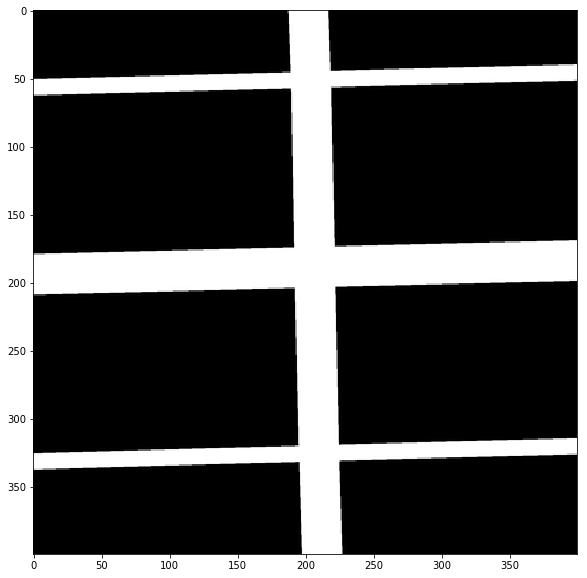

In [40]:
aa = np.rot90(gt_imgs[0])
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(aa, cmap='Greys_r')

In [24]:
mpimg.imsave('testtatts.png', aa)

In [38]:
for i, (img, gt_img) in enumerate(zip(imgs, gt_imgs)):
    tmp = img
    gt_tmp = gt_img
    for k in range(2):
        for j in range(4):
            mpimg.imsave('augmented_training/satellite/sat_{}_{}_{}.png'.format(i, j, k), tmp)
            Image.save('augmented_training/ground_truth/gt_{}_{}_{}.png'.format(i, j, k), gt_tmp)
            tmp = np.rot90(tmp)
            gt_tmp = np.rot90(gt_tmp)
        tmp = np.flip(tmp, 0)
        gt_tmp = np.flip(gt_tmp, 0)

In [47]:
bb = mpimg.imread('augmented_training/satellite/sat_0_0_0.png')

In [48]:
imgs[0].shape, bb.shape

((400, 400, 3), (400, 400, 4))

In [53]:
aaim = Image.fromarray(imgs[0], 'RGB').convert('RGBA')
aaim.save('testestest.png')